In [1]:
import jax
import jax.numpy as jnp

from chromatix import ScalarField
from chromatix.functional import multislice_thick_sample

In [2]:
sample = ScalarField.create(u=jnp.ones((64, 256, 256, 1, 1), dtype=jnp.complex64), dx=0.1, spectrum=0.532, spectral_density=1.0)

In [3]:
@jax.vmap
def apply(kykx: jnp.ndarray) -> ScalarField:
    return multislice_thick_sample(
        sample,
        jnp.zeros_like(sample.u.real).squeeze(),
        jnp.ones_like(sample.u.real).squeeze(),
        1.33,
        (0.532 / 0.8)**2,
        0,
        kykx=kykx
    )

jit_apply = jax.jit(apply)
_ = jit_apply(jnp.array([[0.1, 0.3], [0, 0]]))

In [4]:
%%timeit
# scanned loop, unroll = 64
result = jit_apply(jnp.array([[0.2, 0.1], [0, 0]])).u.block_until_ready()

185 ms ± 53 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
# scanned loop, unroll = 4
result = jit_apply(jnp.array([[0.2, 0.1], [0, 0]])).u.block_until_ready()

188 ms ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit
# scanned loop, unroll = 2
result = jit_apply(jnp.array([[0.2, 0.1], [0, 0]])).u.block_until_ready()

186 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
# scanned loop, unroll = 1
result = jit_apply(jnp.array([[0.2, 0.1], [0, 0]])).u.block_until_ready()

171 ms ± 97.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit
# fully unrolled loop
result = jit_apply(jnp.array([[0.2, 0.1], [0, 0]])).u.block_until_ready()

171 ms ± 38.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


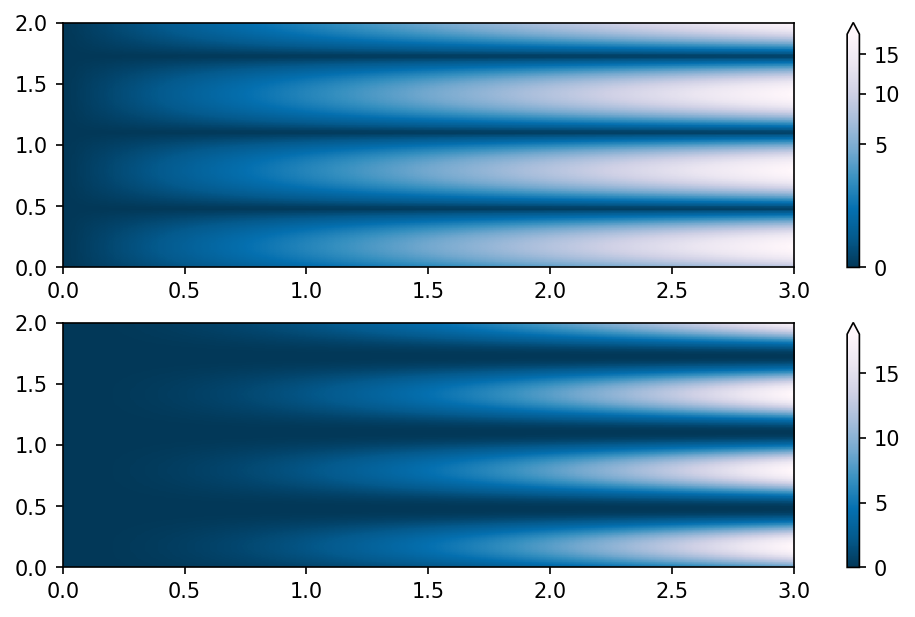

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

N = 100
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**2

fig, axes = plt.subplots(2, 1, constrained_layout=True, dpi=150)
axim = axes[0].imshow(np.rot90(Z1), extent=(X[0, 0], X[-1, -1], Y[0, 0], Y[-1, -1]), cmap="PuBu_r", aspect="auto", norm=mpl.colors.PowerNorm(gamma=0.5))
fig.colorbar(axim, ax=axes[0], extend="max")
axim = axes[1].imshow(np.rot90(Z1), extent=(X[0, 0], X[-1, -1], Y[0, 0], Y[-1, -1]), cmap="PuBu_r", aspect="auto")
fig.colorbar(axim, ax=axes[1], extend="max")
plt.show()